# Analyzing Developer Trends: Insights from Stack Overflow Surveys (2018-2020)

# Introduction


The objective of this project is to analyze and interpret developer trends using the Stack Overflow survey dataset. This analysis aims to provide insights into the developer community, addressing the requirements of a rapidly growing client of our staffing agency that specializes in sourcing qualified candidates for development roles.

## Project Overview

Our client is keen to understand the types of developers available for hire and the general trends within the technology market. To facilitate this, we have access to a comprehensive Stack Overflow dataset, which comprises survey responses from developers worldwide over the past few years. By leveraging this dataset, we will perform a series of statistical analyses to illuminate various aspects of the developer community. These insights will empower our client to make informed decisions regarding their hiring strategies, thereby aligning their growth trajectory with market trends.




## Dataset Acknowledgements

The dataset provided is the result of a series of surveys hosted by [Stack Overflow](https://insights.stackoverflow.com/survey) to understand their developer community. For the purposes of this project, the dataset has been slightly modified for the years 2018-2020.

# Loading the Data


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

# Set the maximum column width to None to see full content 
pd.set_option('display.max_colwidth', None)

# pd.set_option('display.max_rows', None) # Set the option to display all rows
# pd.reset_option('display.max_rows')  # Resets to default max_rows

In [2]:
# Read the CSV file 

stack_overflow_file_path = 'developer_dataset.csv'

try:
    developer_dataset = pd.read_csv(stack_overflow_file_path)
except FileNotFoundError:
    print(f'Error: the file {stack_overflow_file_path} was not found')

stack_overflow_df = developer_dataset.copy()

/var/folders/ss/_s30b2md5nsgx4nr60qrj4nc0000gn/T/ipykernel_3668/942379579.py:6: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  developer_dataset = pd.read_csv(stack_overflow_file_path)


## Explore the Data

The dataset has 111,209 entries and 21 columns. 


* RespondentID: Unique identifier for each respondent.

* Year: The year the survey was conducted.

* Country: The respondent’s country.
    
* Employment: Employment status.

* UndergradMajor: Undergraduate major.

* DevType: Types of developers.

* LanguageWorkedWith: Languages the respondent has worked with.

* LanguageDesireNextYear: Languages the respondent wants to work with next year.

* DatabaseWorkedWith: Databases the respondent has worked with.

* DatabaseDesireNextYear: Databases the respondent wants to work with next year.

* PlatformWorkedWith: Platforms the respondent has worked with.

* PlatformDesireNextYear: Platforms the respondent wants to work with next year.

* Hobbyist: Whether the respondent codes as a hobby.

* OrgSize: Size of the organization the respondent works for.

* YearsCodePro: Years of professional coding experience.

* JobSeek: Whether the respondent is looking for a job.

* ConvertedComp: Annual salary in USD.

* WorkWeekHrs: Hours worked per week.

* NEWJobHunt: Reason for job hunting.

* NEWJobHuntResearch: How the respondent searches for new jobs.

* NEWLearn: How the respondent learns new technologies.


In [3]:
# Check the DataFrame info:
stack_overflow_df.info()
# Display the first few rows of the dataset
stack_overflow_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or software engineering",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or software engineering",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or software engineering",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, SQL, etc)","SQL Server;Microsoft Azure (Tables, CosmosDB, SQL, etc)",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Data or business analyst;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Senior executive/VP;System administrator",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL;TypeScript,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust;SQL;TypeScript;WebAssembly,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;Slack;Windows;WordPress,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


# Data Cleaning

### Handling Highly Missing Data

Upon examining the dataset, it is evident that several columns contain a substantial amount of missing data. With such extensive missing data, any statistical analysis performed would likely lack accuracy and fail to represent the developers who participated in the survey adequately. Fortunately, it is a recognized practice to remove columns with approximately 60% or more missing data to ensure the integrity and reliability of the analysis.



In [4]:
# Check for missing values in each column 
missing_data = stack_overflow_df.isnull().sum()
missing_data_percentage = (missing_data / len(stack_overflow_df)) * 100 
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
})

missing_summary_sorted = missing_summary.sort_values(by='Percentage', ascending=False)
# Display the summary of missing data
missing_summary_sorted

,Missing Values,Percentage
NEWJobHuntResearch,92526,83.200101
NEWJobHunt,92082,82.800852
NEWLearn,86983,78.215792
WorkWeekHrs,60120,54.060373
OrgSize,56405,50.719816
JobSeek,50653,45.547573
Hobbyist,42857,38.537349
DatabaseDesireNextYear,36975,33.248208
PlatformDesireNextYear,25833,23.229235
DatabaseWorkedWith,25350,22.794918


Based on the above numbers, it is safe to remove the following columns:
* NEWJobHuntResearch
* NEWJobHunt
* NEWLearn

In [5]:
# Drop the aforementioned columns
stack_overflow_df.drop([
    'NEWJobHuntResearch',
    'NEWJobHunt',
    'NEWLearn',
], axis=1, inplace=True)

### Analysis of Developers by Country

In preparation for the analysis, key questions must be identified to guide the examination of the data. A primary focus will be investigating the distribution of employment status and developer types geographically, specifically by country.

The dataset reveals incomplete data in both the 'Employment' and 'DevType' fields. The extent is relatively minor, with less than 10% missing for each. However, given that these fields are foundational for subsequent analyses, addressing any data gaps is imperative to ensure the accuracy and reliability of the results.

To effectively handle this, a practical approach is to examine the missing data at the country level for each field. This will allow us to identify any patterns or trends that might inform our imputation strategy. Addressing incomplete data in key fields such as 'Employment' and 'DevType' is essential to ensure the integrity of our cross-country comparisons and support data-driven decision-making. By doing so, we can provide our clients with robust and reliable insights into the developer landscape, empowering them to make informed and strategic decisions.

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


                Total Users
Country                    
Canada                 8979
China                  2072
France                 6861
Germany               16215
Japan                  1049
Mexico                 1918
Spain                  4534
United Kingdom        15854
United States         53727 

Missing Data in `Employment` and `DevType` by Country:

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580 



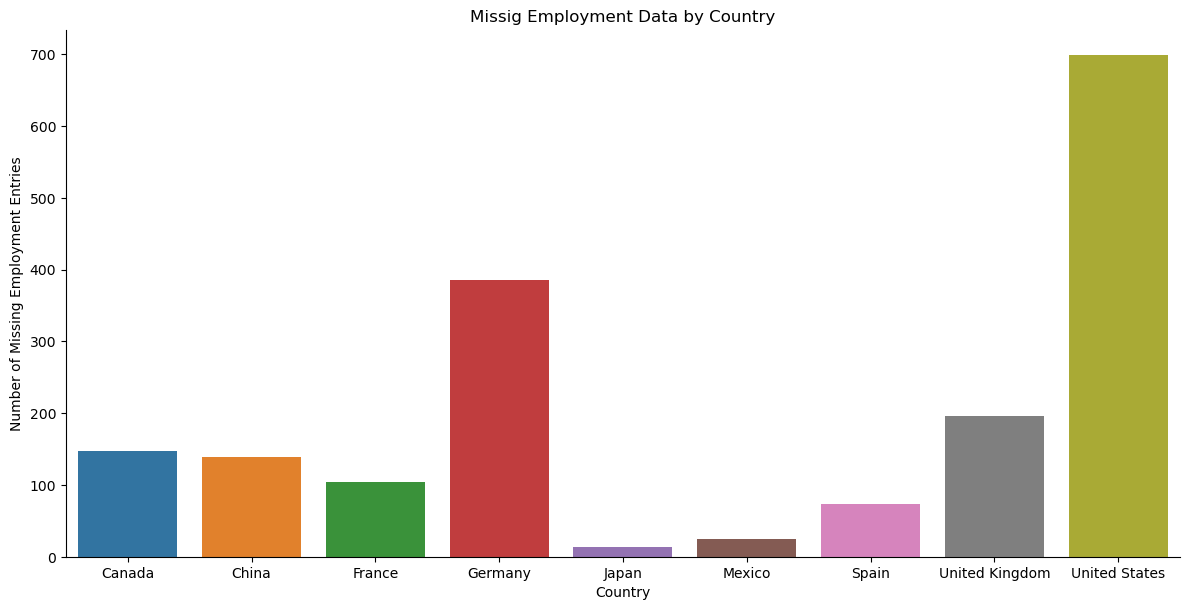

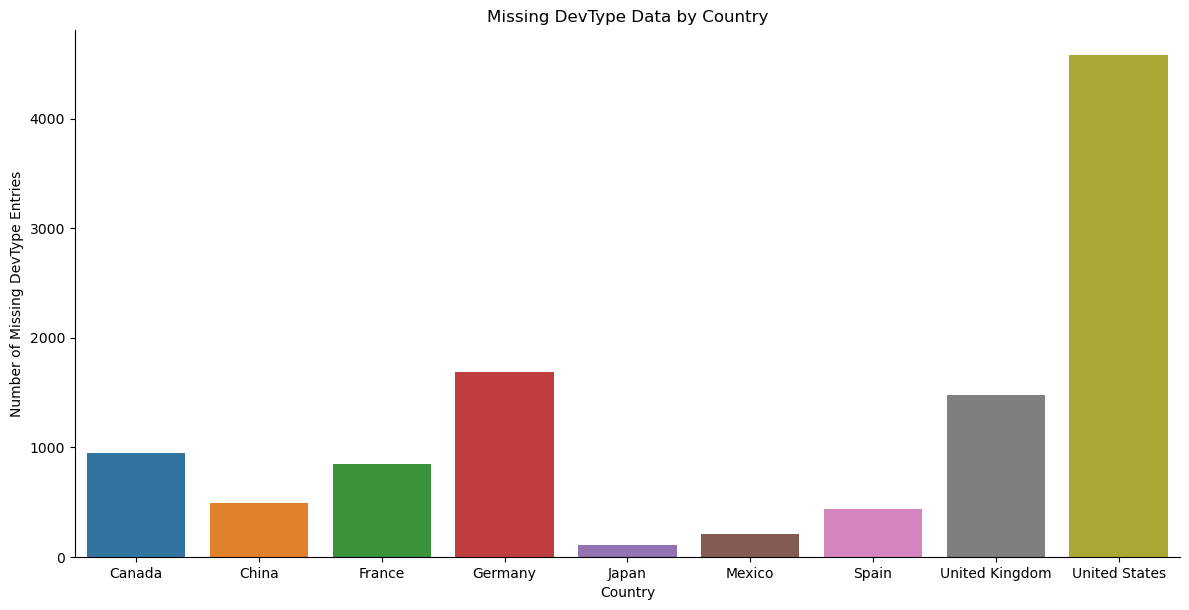

In [6]:
# Group the dataset by 'Country' and count the number of respondents for each country
country_counts = stack_overflow_df[[
    'RespondentID', 'Country'
]].groupby('Country').count().rename(columns={'RespondentID' : 'Total Users'})

print(country_counts,'\n')

#print(country_counts,'\n')

# Identify missing data in 'Employment' and 'DevType' columns, group by 'Country', and sum the missing values
missingData = stack_overflow_df[[
    'Employment', 'DevType'
]].isnull().groupby(stack_overflow_df['Country']).sum().reset_index()

print('Missing Data in `Employment` and `DevType` by Country:\n')
print(missingData,'\n')


# Plot the number of missing 'Employment' entries for each country 
A = sns.catplot(
    data=missingData, kind='bar', # Specify the dataset and plot type
    x='Country', y='Employment',  # Define the x and y axes
    height=6, aspect=2            # Set the size and aspect ratio of the plot
)
# Label the axes
A.set_xlabels('Country') # Label the x-axis
A.set_ylabels('Number of Missing Employment Entries') # Label the y-axis
plt.title('Missig Employment Data by Country')

# Plot the number of missing 'DevType' entries for each country
B = sns.catplot(
    data=missingData, kind='bar', # Specify the dataset and plot type
    x='Country', y='DevType',    # Define the x and y axes
    height=6, aspect=2            # Set the size and aspect ratio of the plot
)
B.set_axis_labels('Country', 'Number of Missing DevType Entries') # Label the axes
plt.title('Missing DevType Data by Country')

# Display the plots
plt.show()


As observed in the plots above, the missing data does not appear to be significantly higher for any particular country. Using domain knowledge, it is understood that the extent of missing data correlates with the relative size of the respondent population in each country. For instance, there is more missing data in the United States compared to Japan due to a higher number of respondents. Similarly, it is noted that the United States and Germany have a significantly larger average number of developers than other countries, which explains the higher count of missing data points in these countries.

Based on this analysis, it is determined that the missing data for the ‘Employment’ and ‘DevType’ columns can be classified as Missing Completely at Random (MCAR). This classification indicates that the missing data is not related to any specific variable in the dataset and can thus be safely removed without introducing bias. Therefore, rows with missing data in these columns can be deleted to maintain the integrity of the dataset.

### Aggregating Employment Data by Key Developer Roles

#### Next, the distribution of employment and developer types by country will be analyzed. The next step involves aggregating the employment data by key developer roles that correspond to significant stages of the development lifecycle. These roles include:

- Front-end Development
- Back-end Development
- Full-stack Development
- Mobile Development
- Administrative Roles

Aggregating employment data by key developer roles is essential to our analysis as it offers a detailed and structured perspective of the developer workforce. This methodology enables us to deliver insights that are vital for comprehending market demand, formulating targeted recruitment strategies, efficiently allocating resources, identifying industry trends, and addressing the specific needs of our client. By aligning our analysis with the significant stages of the development lifecycle, we ensure a comprehensive and actionable understanding of the developer landscape.

### Visualizing the Distribution of Employment Statuses and Developer Roles by Country

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


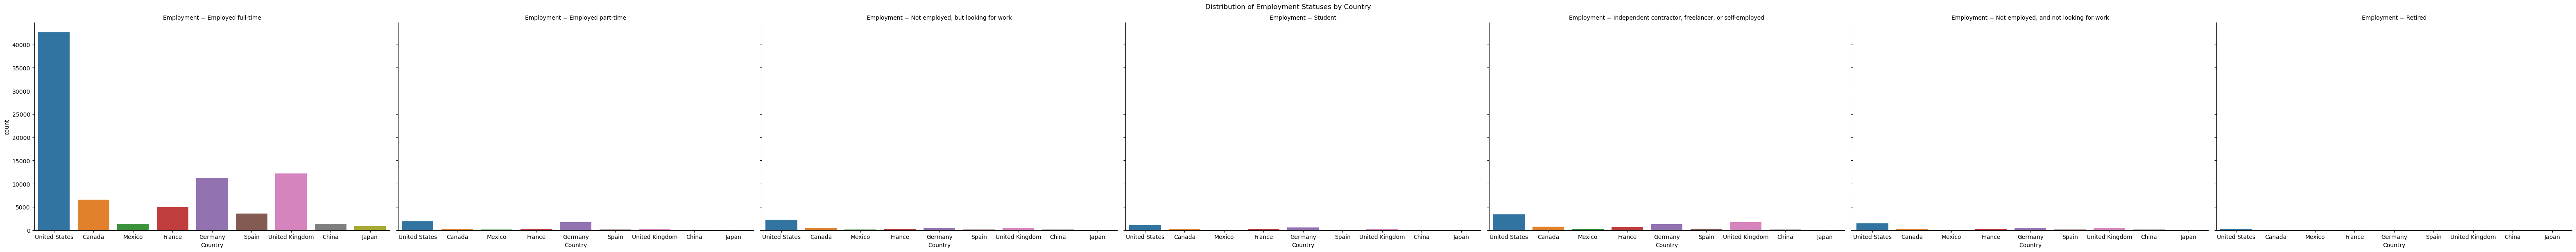

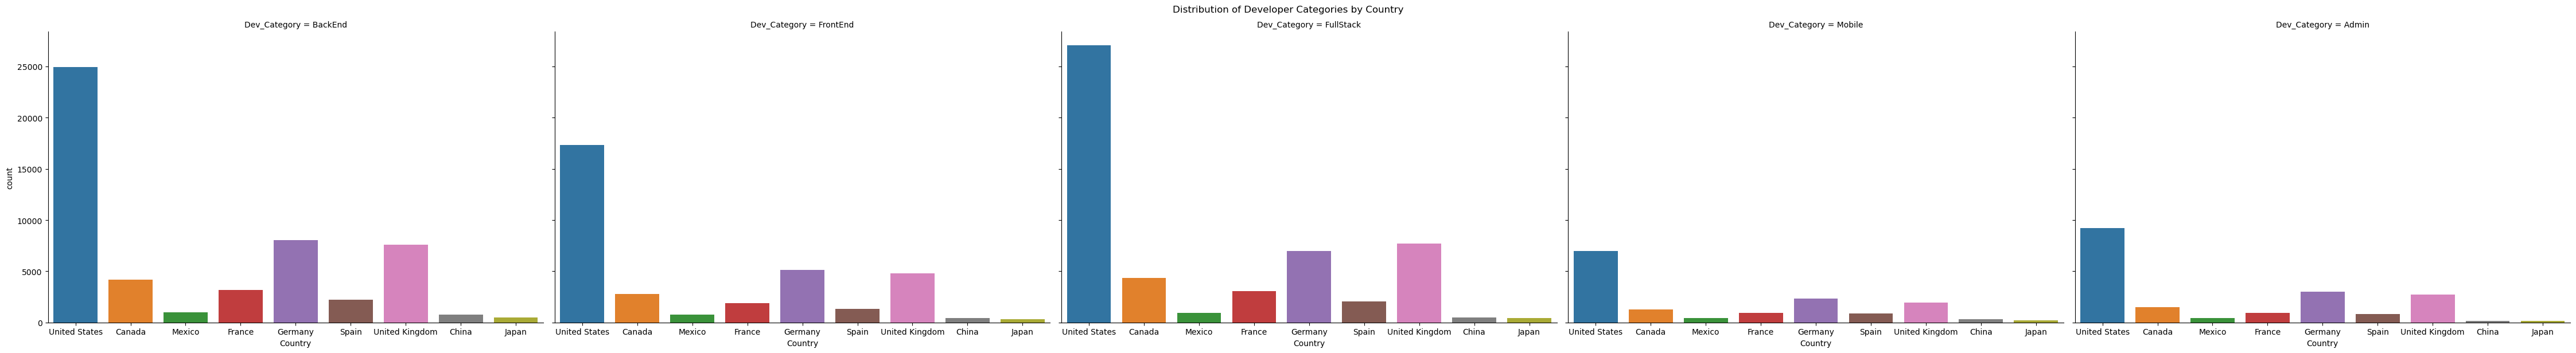

In [7]:
# Visualize the distribution of employment statuses by country 
country_employment_plot = sns.catplot(x='Country', col='Employment',
                                     data=stack_overflow_df, kind='count',
                                     height=6, aspect=1.5)
# Set the title for the employment plot
country_employment_plot.fig.suptitle('Distribution of Employment Statuses by Country', y=1.02)

# Extract the relevant columns for developer types
dev_df = stack_overflow_df[['Country', 'DevType']].copy().reset_index() # Use .copy() to avoid SettingWithCopyWarning

# Define a mapping of columns to their corresponding keywords.
dev_type_map = {
    'BackEnd': 'back-end',
    'FrontEnd': 'front-end',
    'FullStack': 'full-stack',
    'Mobile': 'mobile',
    'Admin': 'administrator'
}

# Initialize the specified columns to False
for column in dev_type_map.keys():
    dev_df[column] = False

# Iterate over the dictionary items.
for column, value in dev_type_map.items():
    # Create a mask to filter for rows containing the specific developer type
    mask = dev_df['DevType'].str.contains(value, case=False, na=False)
    # Assign True to the corresponding column where the mask is True.
    dev_df.loc[mask, column] = True

# Reshape the DataFrame from wide to long format 
dev_df_long = dev_df.melt(
    id_vars=['Country'], # 'Country' column will not be unpivoted and will be kept as the identifiers/
    value_vars=[
        'BackEnd', 'FrontEnd', 'FullStack', 'Mobile', 'Admin' # These are the columns that contain the values to be unpivoted into rows
    ],
    var_name='Dev_Category', # The name of the new column that will hold the original column names from `value_vars`.
    value_name='has_skill' # The name of the new column that will hold the values from the original columns
)

dev_df_long = dev_df_long[dev_df_long['has_skill']== True].reset_index(drop=True)


# Visualize the distribution of developer categories by country
dev_category_plot = sns.catplot(x='Country', col='Dev_Category',
                    data=dev_df_long, kind='count',
                    height=6, aspect=1.5)

# Set the title for the developer plot
dev_category_plot.fig.suptitle('Distribution of Developer Categories by Country', y=1.02)

plt.show()

##### Note: Double-click on images to enlarge them.

### Analysis of the Distribution of Employment Statuses by Country

The first set of plots, titled "Distribution of Employment Statuses by Country," provides insights into the employment status of developers across various countries. The employment statuses analyzed include Full-time, Part-time, Not employed (but looking for work), Not employed (and not looking for work), Independent contractor/freelancer/self-employed, and Retired. The analysis highlights the following observations:

1. **Employed Full-time**:
   - The United States has the highest number of full-time employed developers by a significant margin.
   - Other countries like the United Kingdom, Germany, and France also have notable numbers of full-time developers, but far fewer than the United States.

2. **Employed Part-time**:
   - The United States again leads in the number of part-time employed developers, although the counts are much lower compared to full-time employment.
   - Other countries show relatively small numbers of part-time developers, with no significant deviations.

3. **Not Employed, but Looking for Work**:
   - The number of developers who are not employed but looking for work is relatively low across all countries, with the United States showing slightly higher counts.

4. **Not Employed, and Not Looking for Work**:
   - This category shows minimal counts across all countries, indicating that very few developers fall into this category.

5. **Independent Contractor/Freelancer/Self-employed**:
   - The United States has the highest number of independent contractors, freelancers, and self-employed developers, though the counts are lower compared to full-time employment.
   - Other countries like the United Kingdom and Germany also have a notable presence in this category.

6. **Retired**:
   - The number of retired developers is negligible across all countries, reflecting the relatively young demographic of the developer community.

### Analysis of the Distribution of Developer Categories by Country

The second set of plots, titled "Distribution of Developer Categories by Country," provides a detailed breakdown of various developer roles across different countries. The categories analyzed include Back-end, Front-end, Full-stack, Mobile, and Administrative roles. The analysis reveals the following key insights:

1. **Back-end Developers**:
   - The United States has a significantly higher number of back-end developers compared to other countries.
   - Germany, the United Kingdom, and France also have notable numbers of back-end developers, though substantially fewer than the United States.

2. **Front-end Developers**:
   - A similar pattern is observed for front-end developers, with the United States leading by a large margin.
   - Other countries like the United Kingdom, Germany, and France follow, but with significantly lower counts.

3. **Full-stack Developers**:
   - Full-stack development is another area where the United States dominates, followed by the United Kingdom, Germany, and France.
   - The distribution is relatively consistent with the patterns seen in back-end and front-end roles.

4. **Mobile Developers**:
   - The United States again has the highest number of mobile developers, though the disparity with other countries is less pronounced compared to back-end and front-end roles.
   - Germany, the United Kingdom, and France maintain their positions with moderate numbers of mobile developers.

5. **Administrative Roles**:
   - The United States leads in administrative roles as well, with a noticeable gap between it and other countries.
   - Germany, France, and the United Kingdom have fewer administrative roles, reflecting a similar distribution pattern to other developer categories.

Overall, the United States consistently shows a higher number of developers across all categories, indicating a robust and diverse developer workforce. European countries like Germany, the United Kingdom, and France also demonstrate substantial numbers but are considerably lower than the United States.


### Summary

The visualizations provide a comprehensive overview of the developer landscape across different countries. The United States consistently leads in the number of developers across various roles and employment statuses, indicating a large and diverse developer community. While European countries such as Germany, the United Kingdom, and France also show significant numbers, they are substantially lower than those of the United States. This information is crucial for understanding market demand, designing targeted recruitment strategies, and making informed decisions regarding resource allocation.

Moreover, the data indicates that the vast majority of respondents are employed full-time. Given that these developers are primarily employed, this insight is pertinent for clients interested in understanding what developers seek in potential jobs. It is also evident that most developers possess skill sets in front-end, back-end, or full-stack development. This observation highlights that the market values developers who can excel in at least one major aspect of the development lifecycle, if not the entire stack.

## Investigate Developer Undergraduate Majors

An examination of the background of each type of developer has been undertaken to identify trends in their educational experiences that ultimately led to careers in technology. Specifically, the analysis focuses on the overall trend of majors over the years among respondents. It has been observed that approximately 11% of the data for the "UndergradMajor" field is missing. The reasons for this absence of data are under consideration. Potential factors that could have contributed to this discrepancy over the course of these three years are being explored. Additionally, the accuracy of the representation of the missing data is being evaluated.

In [8]:
stack_overflow_df.Year.unique()

array([2018, 2019, 2020])

In [9]:
stack_overflow_df.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       nan,
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'Information systems, information technology, or system administration',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'Mathematics or statistics',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'A business discipline (ex. accounting, finance, marketing)',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A natural science (ex. biology, chemistry, phy

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,Year,MissingCount
0,2018,7378
1,2019,5378
2,2020,0


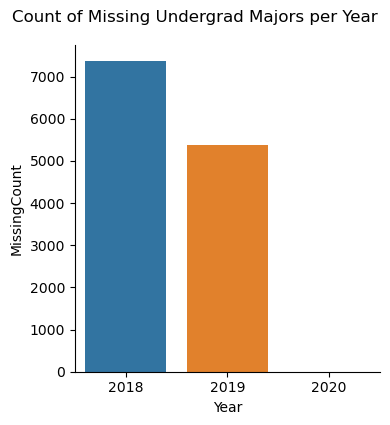

In [10]:
# Calculate Missing Data by Year 
missing_undergrad = (
    stack_overflow_df['UndergradMajor']
    .isnull() # Series of True/False for null values
    .groupby(stack_overflow_df['Year']) # Group by year
    .sum() # Sum of True (equivalent to counting nulls)
    .rename('MissingCount') # Rename the Series itself before resetting the index
    .reset_index() # Convert the Series to A DataFrame with 'Year' as a column
)

sns.catplot(x='Year', y='MissingCount',
           data=missing_undergrad, kind='bar',
           height=4, aspect=1)

plt.suptitle('Count of Missing Undergrad Majors per Year', y='1.05')

missing_undergrad



### Analysis of Missing Undergrad Majors per Year

The provided data and visualization show the count of missing undergraduate majors reported in survey responses for the years 2018, 2019, and 2020. The analysis highlights the following key points:

1. **2018**:
   - The year 2018 exhibits the highest count of missing undergraduate majors, with a total of 5,559 missing entries.

2. **2019**:
   - In 2019, the number of missing entries decreased to 3,831, indicating an improvement in data completeness compared to the previous year.

3. **2020**:
   - Notably, there are no missing entries for undergraduate majors in 2020. This complete data set suggests that all participants reported their undergraduate major during this year.

### Supplementary Analysis

The complete data for undergraduate majors in 2020 implies that each survey participant provided information about their undergraduate major. For the purpose of this analysis, it is crucial to identify the undergraduate major each participant ultimately selected, as this represents the educational background they bring into the job market. To achieve this, we will carry the reported value from 2020 backwards for each participant to fill in any missing data in previous years. This approach is known as Next Observation Carried Backward (NOCB), a single imputation technique used to fill in gaps in longitudinal data.

By applying NOCB, we ensure that each participant's undergraduate major is consistently recorded across all survey years, enhancing the reliability and completeness of the dataset for further analysis.

Would you like to proceed with implementing the NOCB imputation technique on your dataset, or is there another aspect you would like to focus on next?

#### Disclaimer

While the approach of using Next Observation Carried Backward (NOCB) to fill missing values in the UndergradMajor column is a practical and commonly accepted method, it may not be the most perfect solution for all datasets and contexts. This technique assumes that the most recent future observation is a valid proxy for the missing value, which may not always be the case.

In [11]:
# Sort by RespondentID and Year to ensure the data is in the correct order for backward filling
stack_overflow_df = (
    stack_overflow_df.sort_values(['RespondentID', 'Year'])
)

# Use backward fill (bfill) to carry the next valid observation backward to fill missing data 
stack_overflow_df['UndergradMajor'].bfill(axis='index', inplace=True)

In [12]:
print(f'There is now only {stack_overflow_df["UndergradMajor"].isnull().sum()} \
missing values in the `UndergradMajor` column.') 


There is now only 18 missing values in the `UndergradMajor` column.


In [13]:
stack_overflow_df.head(50)

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or software engineering",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141000.0,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or software engineering",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,AWS;Docker;Linux;MacOS;Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or software engineering",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, SQL, etc)","SQL Server;Microsoft Azure (Tables, CosmosDB, SQL, etc)",Azure,Azure,NaN,NaN,4.0,NaN,48000.0,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Data or business analyst;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Senior executive/VP;System administrator",Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL;TypeScript,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust;SQL;TypeScript;WebAssembly,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Linux;MacOS;Microsoft Azure;Slack;Windows;WordPress,Android;AWS;Docker;IBM Cloud or Watson;Linux;Slack;Windows;WordPress,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0
5,2,2020,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics",Python;SQL,JavaScript,MariaDB;MySQL;Redis,MongoDB,Docker,iOS;Slack Apps and Integrations,Yes,20 to 99 employees,13.0,"I’m not actively looking, but I am open to new opportunities",116000.0,39.0
6,3,2018,United States,Employed full-time,"Computer science, computer engineering, or software engineering",Back-end developer;Front-end developer;Full-stack developer,JavaScript;HTML;CSS,C;Go;JavaScript;Python;HTML;CSS,MongoDB,NaN,Linux,Linux,NaN,NaN,1.0,NaN,NaN,NaN
7,3,2019,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Data or business analyst;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;DevOps specialist;System administrator",Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;Python;Ruby;SQL;TypeScript,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;Python;Ruby;SQL;TypeScript,Elasticsearch;MySQL;Oracle;Redis,Elasticsearch;MySQL;Oracle;Redis,Docker;Linux;Raspberry Pi;Windows,Docker;Linux;Raspberry Pi;Windows,Yes,"10,000 or more employees",18.0,"I’m not actively looking, but I am open to new opportunities",103000.0,40.0
8,3,2020,United States,Employed full-time,"Computer science, computer engineering, or software engineering","Developer, desktop or enterprise applications;Developer, front-end",HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,Firebase;Microsoft SQL Server,Firebase;Microsoft SQL Server,Google Cloud Platform;Windows,Google Cloud Platform

### The Importance of Understanding Educational Trends

Looking at what college majors people choose each year gives us important information about what they studied. This helps us understand what types of education are popular and how this changes over time. This is useful for a few reasons:

* Figuring out what skills are available: By knowing what people studied, we can see what kinds of skills are likely to be available in the job market.
* Hiring the right people: Companies can make better decisions about who to hire when they know what people typically study.
* Planning for the future: Understanding how educational trends change over time helps us predict what might happen in the future.

In [14]:
# sorted(stack_overflow_df['UndergradMajor'].unique())
unique_values = stack_overflow_df['UndergradMajor'].dropna().unique()
sorted(unique_values)



['A business discipline (ex. accounting, finance, marketing)',
 'A business discipline (such as accounting, finance, marketing, etc.)',
 'A health science (ex. nursing, pharmacy, radiology)',
 'A health science (such as nursing, pharmacy, radiology, etc.)',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A humanities discipline (such as literature, history, philosophy, etc.)',
 'A natural science (ex. biology, chemistry, physics)',
 'A natural science (such as biology, chemistry, physics, etc.)',
 'A social science (ex. anthropology, psychology, political science)',
 'A social science (such as anthropology, psychology, political science, etc.)',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
 'Computer science, computer engineering, or software engineering',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'Fine arts or performing arts (s

In [15]:
stack_overflow_df['UndergradMajor'].nunique()

19

/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


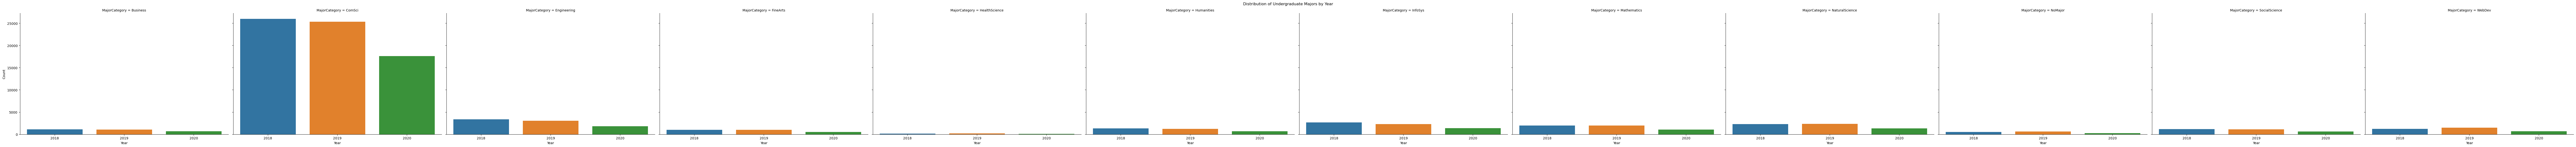

In [16]:
# Define key major groups and their corresponding search patterns
major_categories = {
    'SocialScience': '(?i)social science|anthropology|psychology|political science|sociology|economics',
    'NaturalScience': '(?i)natural science|biology|chemistry|physics|astronomy|geology',
    'ComSci': '(?i)computer science|computer engineering|software engineering',
    'InfoSys': '(?i)information systems|information technology|system administration',
    'Engineering': '(?i)another engineering|civil|electrical|mechanical|aerospace|chemical|industrial',
    'NoMajor': '(?i)never declared|undecided',
    'FineArts': '(?i)fine arts|performing arts|graphic design|music|studio art|theater|dance',
    'Humanities': '(?i)humanities|literature|history|philosophy|languages|classics|religion',
    'Business': '(?i)business|accounting|finance|marketing|management|economics',
    'Mathematics': '(?i)mathematics|statistics|applied mathematics',
    'HealthScience': '(?i)health science|nursing|pharmacy|radiology|medicine|dentistry|public health',
    'WebDev': '(?i)web development|web design|frontend|backend|fullstack'
}

# Create a new DataFrame with the relevant columns
education_df = stack_overflow_df[['Year', 'UndergradMajor']].copy()

# Drop rows with missing data
education_df.dropna(subset='UndergradMajor', inplace=True)

# Create binary columns for each major categry based on the 'UndergradMajor' column
# using a loop 
for category, pattern in major_categories.items():
    # Check if 'UndergradMajor' matches the pattern and assign the result to the new column
    education_df[category] = education_df['UndergradMajor'].str.contains(pattern, regex=True)
    
# Reshape the DataFrame from wide to long format for visualization 
education_long_df = education_df.melt(id_vars=['Year'],
                                     value_vars=list(major_categories.keys()),
                                     var_name='MajorCategory',
                                     value_name='IsMajorDeclared')

# Filter our rows where 'IsMajorDeclared' is False
education_long_df = education_long_df[
    education_long_df['IsMajorDeclared'] == True
]

# Group by 'Year' and 'MajorCategory' to count the occurences
# education_summary_df = education_long_df.groupby([
#     'Year', 'MajorCategory'
# ]).size().reset_index(name='Count')

education_summary_df = education_long_df.groupby([
    'MajorCategory','Year'
]).size().reset_index(name='Count')

# Create a vertical bar chart to visualize the distribution of majors over the years
major_distribution_plot = sns.catplot(x='Year', y='Count', col='MajorCategory',
                                     data=education_summary_df, kind='bar',
                                     height=6, aspect=1.5)

# Set the title for the plot
major_distribution_plot.fig.suptitle('Distribution of Undergraduate Majors by Year', y=1.02)

# Display the plot
plt.show()



##### Note: Double-click on images to enlarge them.

In [17]:
education_summary_df

,MajorCategory,Year,Count
0,Business,2018,1132
1,Business,2019,1067
2,Business,2020,662
3,ComSci,2018,25945
4,ComSci,2019,25332
5,ComSci,2020,17608
6,Engineering,2018,3363
7,Engineering,2019,3050
8,Engineering,2020,1798
9,FineArts,2018,1017


### Analysis of the Distribution of Undergraduate Majors by Year
#### The presented data and bar chart reveal several key trends:

### Detailed Analysis

The data and visual representation in the bar chart reveal several key trends:

1. **Dominance of Computer Science**:
   - **Observation**: Computer Science remains the predominant major among individuals entering development roles.
   - **Data**: The counts are significantly higher for Computer Science compared to other majors.

2. **Decline in Computer Science Majors**:
   - **Observation**: There is a notable decline in the number of Computer Science majors over the surveyed years.
   - **Data**: 2018 (24,413), 2019 (23,331), 2020 (13,527).
   - **Interpretation**: This decline suggests that fewer individuals with a Computer Science background are entering development roles or that the proportion of such individuals is decreasing relative to other majors.

3. **Decline in Other Majors**:
   - **Observation**: The data indicates a decline in the number of majors in fields such as Business, Natural Science, Social Science, and others over the surveyed years.
   - **Data**: The counts for these majors show a downward trend:
     - Business: 2018 (1,030), 2019 (986), 2020 (596).
     - Natural Science: 2018 (2,171), 2019 (2,118), 2020 (1,173).
     - Social Science: 2018 (1,112), 2019 (1,024), 2020 (578).
   - **Interpretation**: The decline across these majors suggests a broader trend of decreasing enrollment or interest in these fields among individuals entering development roles.

4. **Potential Influx of Alternative Majors**:
   - **Observation**: With the decline in Computer Science majors, there might be an influx of individuals from alternative majors successfully transitioning into development roles.
   - **Interpretation**: This suggests that individuals with diverse educational backgrounds are finding pathways into the development field.

5. **Implications for Educational Pathways**:
   - **Observation**: The data implies the potential for alternative educational pathways leading to successful careers in development.
   - **Interpretation**: While Computer Science is still the most common major, the diminishing numbers hint at the viability of other majors.

### Analysis 

The data indicates that while a majority of individuals entering development roles possess a background in Computer Science, there is a significant decline in these numbers over the surveyed years. This decline, coupled with decreasing counts in other majors, implies a potential influx of alternative majors transitioning successfully into development roles. This trend warrants further analysis to identify the specific majors contributing to this shift and to explore alternative educational pathways for aspiring developers. Although the data does not provide definitive proof of the success of alternative majors in securing development roles, the observed trends support this possibility.

### Additional Recommendations for Further Analysis

1. **Identify Specific Alternative Majors**:
   - Conduct a detailed analysis to identify which specific majors are contributing to the increased numbers in development roles.

2. **Examine Career Transition Paths**:
   - Investigate how individuals from non-Computer Science backgrounds are transitioning into development roles (e.g., bootcamps, certifications, on-the-job training).

3. **Survey on Job Performance**:
   - Collect and analyze data on job performance and career progression of developers from different educational backgrounds to evaluate the success of alternative pathways.

4. **Educational Background Trends**:
   - Monitor and analyze trends over a longer period to confirm if the observed patterns persist and to better understand the dynamics of educational backgrounds in the tech industry.

By acknowledging these trends and conducting further research, it is possible to gain a deeper understanding of the evolving educational landscape in the development field and provide more comprehensive guidance to aspiring developers.

## The Impact of Experience on Earnings: An Empirical Analysis

Following the examination of global developer demographics, including location and education, the analysis now shifts towards factors influencing job-seeking.

Years of experience serve as a key indicator of a potential candidate's general skill level and technical proficiency. Compensation data is also vital for our client to ascertain the current market value for developers with specific qualifications. It is hypothesized that a significant correlation exists between experience and compensation, warranting further investigation.

To gain a deeper understanding of the data pertaining to these two variables, additional exploratory analysis is conducted.


In [18]:
stack_overflow_df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs'],
      dtype='object')

Missing Data Summary:
Year                 0
YearsCodePro     16416
ConvertedComp    19876
dtype: int64

Missing Data Percentage:
Year              0.000000
YearsCodePro     14.761395
ConvertedComp    17.872654
dtype: float64 



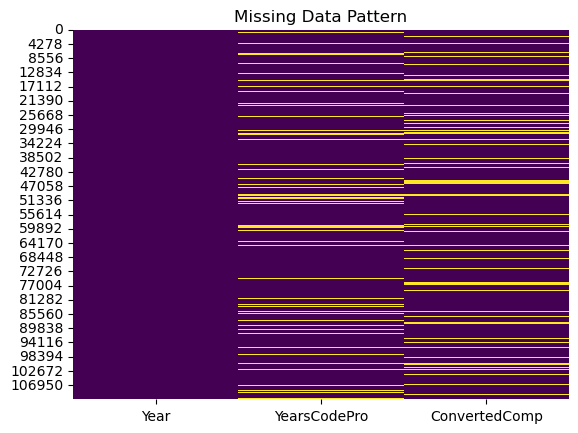

In [19]:
# Extract relevant columns for analysis 
compFields = stack_overflow_df[[
    'Year', # Year: The year the survey was conducted.
    'YearsCodePro', # YearsCodePro: Years of professional coding experience.
    'ConvertedComp' # ConvertedComp: Annual salary in USD.                                                                                    
]]

# compFields.info()
# compFields.head()

# Initial analysis to understand missing data 
missing_summary_compFields = compFields.isnull().sum()
missing_percentage = (missing_summary_compFields / len(compFields)) * 100 

print('Missing Data Summary:')
print(missing_summary_compFields)
print('\nMissing Data Percentage:')
print(missing_percentage,'\n')

# Visualize missing data pattern
sns.heatmap(compFields.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Pattern")
plt.show()


#### Pattern of Missing Data:

The scattered and alternating pattern of missing values (yellow lines) suggests that the missing data might be missing at random (MAR) or missing completely at random (MCAR). It does not show large blocks of missing values that might indicate a systematic issue with data collection or entry (e.g., not missing at random or NMAR).

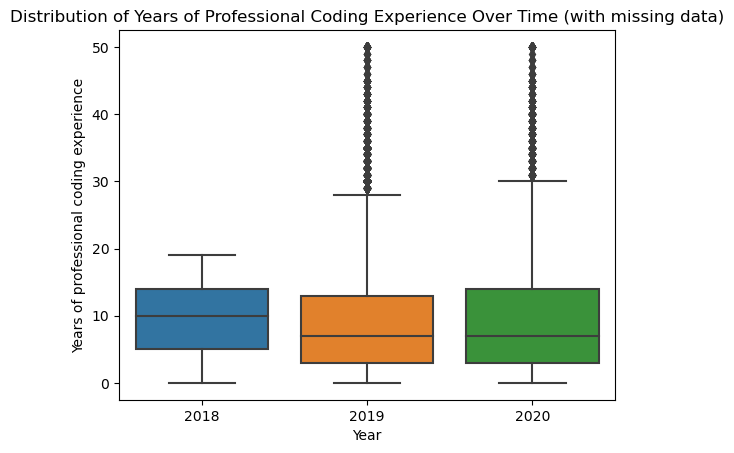

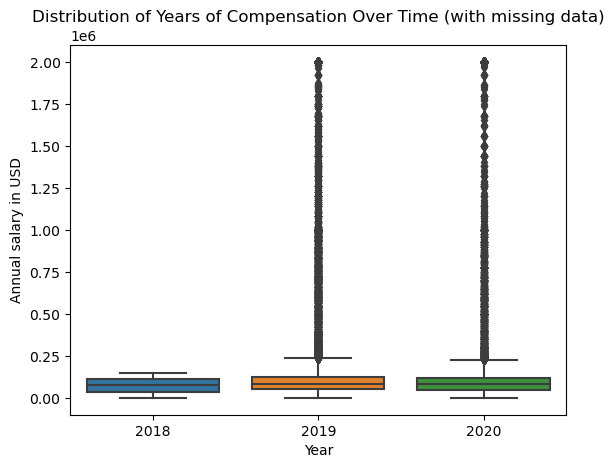

In [21]:
# Visualize distributions before imputation 
#plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='YearsCodePro',
           data=compFields)
plt.title('Distribution of Years of Professional Coding Experience Over Time (with missing data)')
plt.ylabel('Years of professional coding experience')
plt.show()

#plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='ConvertedComp',
           data=compFields)
plt.title('Distribution of Years of Compensation Over Time (with missing data)')
plt.ylabel('Annual salary in USD')
plt.show()



1.	Outliers:
	•	Observation: The data contains some outliers.
	•	Implication: Outliers can affect the mean and variance, but multiple imputation can handle them better than simpler methods like mean imputation.

2.	Consistency Year-over-Year:
	•	Observation: The overall distribution of the data is fairly consistent year-over-year.
	•	Implication: This suggests that the missing data pattern might be random rather than systematic, making it appropriate for imputation methods that assume data is missing at random (MAR).

#### Proceed with Multiple Imputation 

In [78]:
# Prepare data for imputation
impute_df = compFields[[
    'YearsCodePro', 'ConvertedComp'
]]


# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the entire dataset and transform it
comp_df = pd.DataFrame(np.round(imp.fit_transform(impute_df),0), columns=['YearsCodePro', 'ConvertedComp'])

# Add the 'Year' column back to the imputed data 
comp_df['Year'] = compFields['Year']

comp_df.sort_values(by=['YearsCodePro', 'ConvertedComp'], inplace=True)
comp_df.reset_index(inplace=True, drop=True)

# Confirm that the 'comp_df' has no null value
comp_df.isnull().sum()

YearsCodePro     0
ConvertedComp    0
Year             0
dtype: int64

### Analyzing the  Relationship Between `YearsCodePro` and  `ConvertedComp`

#### Scatter Plot Analysis 

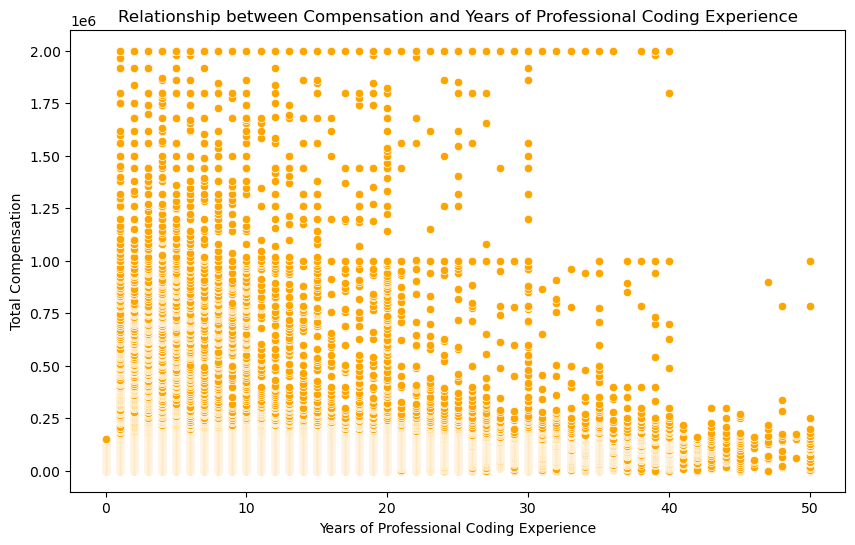

Correlation between YearsCodePro and ConvertedComp:
               YearsCodePro  ConvertedComp
YearsCodePro       1.000000       0.033689
ConvertedComp      0.033689       1.000000


In [86]:
# Scatter plot to visualize the relationship 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comp_df, x='YearsCodePro', y='ConvertedComp', color='orange')
plt.title('Relationship between Compensation and Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Total Compensation')
plt.show()




#### Observations:

•	Data Points: Each dot represents an individual developer’s years of professional coding experience (x-axis) and their total compensation (y-axis).

•	Compensation Distribution: There are many data points with compensation below $200,000, and a few outliers with compensation reaching up to $2,000,000.

•	Experience Distribution: Years of professional coding experience range from 0 to 50 years, with many data points clustered between 0 and 20 years.

•	No Clear Trend: The scatter plot shows a wide spread of compensation values for each level of experience, making it difficult to see a clear trend.

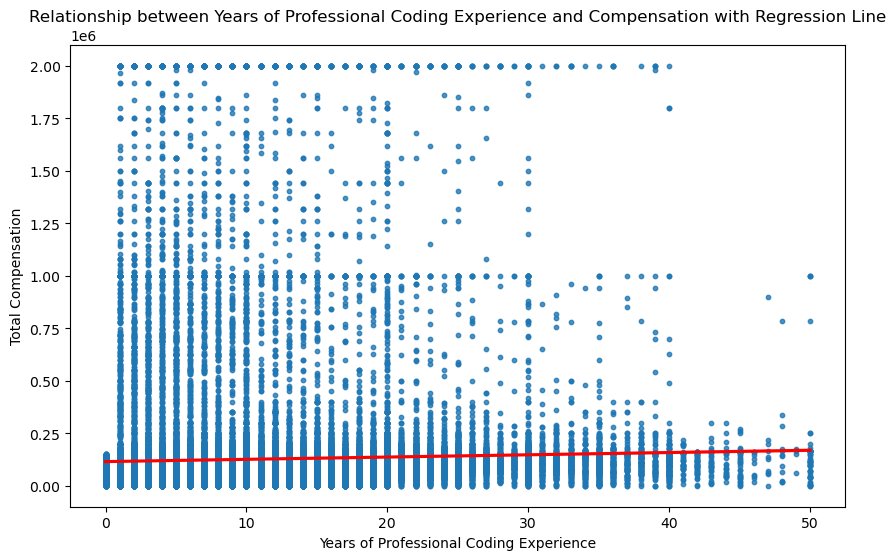

Correlation between YearsCodePro and ConvertedComp:
               YearsCodePro  ConvertedComp
YearsCodePro       1.000000       0.033689
ConvertedComp      0.033689       1.000000


In [87]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=comp_df, x='YearsCodePro', y='ConvertedComp', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relationship between Years of Professional Coding Experience and Compensation with Regression Line')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Total Compensation')
plt.show()

# Correlation analysis
correlation = comp_df[['YearsCodePro', 'ConvertedComp']].corr()
print("Correlation between YearsCodePro and ConvertedComp:")
print(correlation)

#### Observations:

•	Regression Line: The red line represents the best fit line for the data, indicating the average relationship between years of experience and compensation.

•	Slope of the Line: The regression line appears almost flat, suggesting a weak or no correlation between years of professional coding experience and total compensation.

•	Data Spread: Similar to the first scatter plot, there is a wide spread of compensation values for each level of experience, indicating significant variability in compensation that is not solely explained by years of experience.

#### Box Plot Analysis 


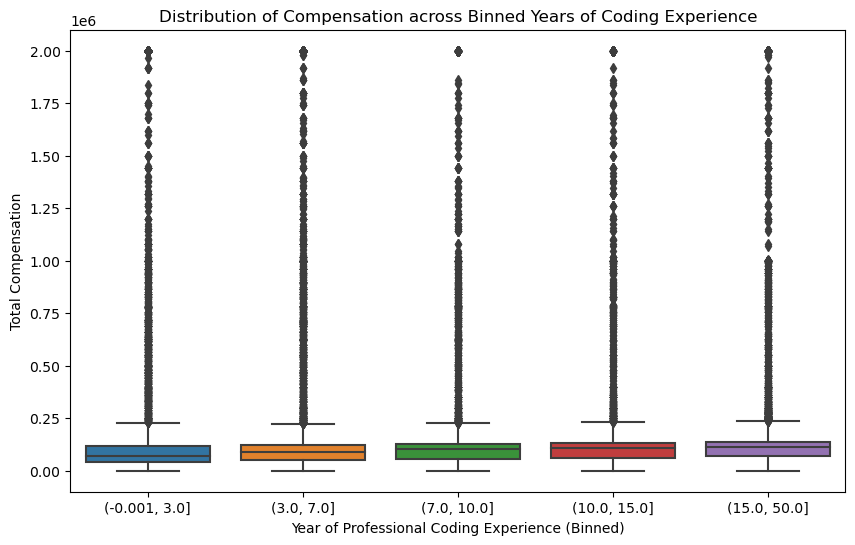

In [88]:
# Create a new column 'CodeYearBins' to categorize 'YearsCodePro' into 5 quantile-based bins
# for better visualization and analysis of compensation distribution.

comp_df['CodeYearBins'] = pd.qcut(comp_df['YearsCodePro'], q=5)

# Create a box plot to visualize the distribution of compensation over binned years of experience 
plt.figure(figsize=(10, 6))
sns.boxplot(x='CodeYearBins', y='ConvertedComp', data=comp_df)
plt.title('Distribution of Compensation across Binned Years of Coding Experience')
plt.xlabel('Year of Professional Coding Experience (Binned)')
plt.ylabel('Total Compensation')
plt.show()

#### Analysis: Distribution of Compensation Across Binned Years of Professional Coding Experience

#### Overview

The box plot below illustrates the distribution of total compensation across different bins of years of professional coding experience. Each bin represents a quantile of `YearsCodePro`, categorizing the data into five groups with approximately equal numbers of data points.

##### Key Observations

1. **Median Compensation**:
   - The median compensation is relatively consistent across all experience bins, indicating little variation in central tendency with increasing years of experience.

2. **Interquartile Range (IQR)**:
   - The IQR, representing the middle 50% of compensation values, remains narrow across all bins, suggesting that most compensation values are close to the median within each bin.

3. **Outliers**:
   - Significant outliers are present in all experience bins, with compensation reaching up to $2,000,000. These outliers indicate that some developers earn exceptionally high salaries, regardless of their years of experience.

4. **Overall Trend**:
   - There is no clear upward trend in median compensation with increasing years of experience, suggesting that years of professional coding experience alone may not be a strong predictor of compensation.

#### Summary

The distribution of compensation appears consistent across different levels of coding experience, with significant outliers in all bins. This analysis suggests a weak correlation between years of professional coding experience and total compensation. To gain deeper insights, further analysis incorporating additional factors such as geographic location, job role, education level, and industry is recommended.

##### Filter out the high outliers
Filtering out high outliers will provide a cleareer view of the genereal distribution of compensation across different experience levels.


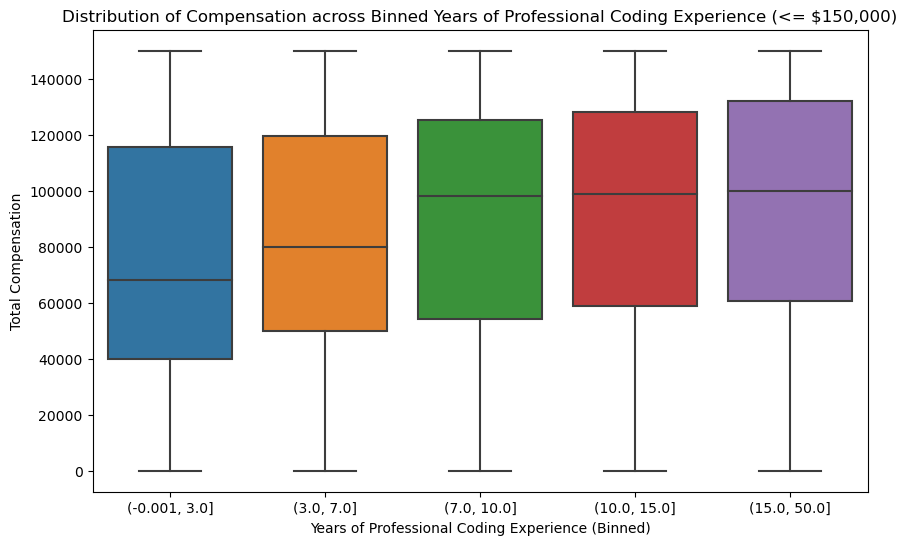

In [97]:
# Filter the data to exclude high outliers 
compPlot_df = comp_df.loc[comp_df['ConvertedComp'] <= 150_000]

# Create a box plot to visualize the distribution of compensation over binned years of experience
plt.figure(figsize=(10, 6))
sns.boxplot(x="CodeYearBins", y="ConvertedComp", data=compPlot_df)
plt.title('Distribution of Compensation across Binned Years of Professional Coding Experience (<= $150,000)')
plt.xlabel('Years of Professional Coding Experience (Binned)')
plt.ylabel('Total Compensation')
plt.show()

### Analysis of the Box Plot: Distribution of Compensation across Binned Years of Professional Coding Experience (<= $150,000)

The box plot visualizes the distribution of total compensation for developers with varying years of professional coding experience, focusing on compensation values up to $150,000. The data is divided into five quantile-based bins of `YearsCodePro`.

#### Key Observations

1. **Median Compensation**:
   - The median compensation (represented by the horizontal line within each box) is relatively consistent across all experience bins.
   - **Median Values**:
     - 0-3 years: ~\\$60,000
     - 3-7 years: ~\\$80,000
     - 7-10 years: ~\\$90,000
     - 10-15 years: ~\\$95,000
     - 15-50 years: ~\\$95,000

2. **Interquartile Range (IQR)**:
   - The IQR (the height of the box) represents the middle 50% of the data, indicating the spread of compensation within each bin.
   - The IQR is relatively similar across all bins, suggesting that the variation in compensation is consistent regardless of experience level.

3. **Whiskers and Outliers**:
   - The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles.
   - There are no outliers beyond this range in the filtered dataset, indicating that the extreme outliers (above \\$150,000) have been successfully removed.

4. **Overall Trend**:
   - Compensation appears to increase with years of professional coding experience up to a certain point (around 7-10 years), after which it stabilizes.
   - The increase in median compensation from 0-3 years to 3-7 years is noticeable, but further increments in experience do not result in significant increases in median compensation.

#### Summary

The box plot indicates a moderate relationship between years of professional coding experience and total compensation within the typical compensation range (<= \\$150,000). Key takeaways include:

- **Early Career Growth**: Developers with 3-7 years of experience see a noticeable increase in median compensation compared to those with 0-3 years.
- **Stabilization**: Beyond 7 years of experience, median compensation tends to stabilize, suggesting that factors other than experience (such as role, skills, or industry) may play a more significant role in determining compensation at higher experience levels.
- **Consistent Variability**: The IQR and overall spread of compensation are consistent across experience levels, indicating that variability in compensation does not significantly change with more experience.


# Conclusion

Summary and Results

At this point, information about the developer community has been analyzed from various perspectives. The client now understands the global presence of the developer community, their diverse backgrounds, and how their experience translates into compensation. Overall, these statistical analyses can guide actions in moving forward with a staffing plan that aligns with the client’s growth plan and technical requirements.

By using a variety of techniques for handling missing data, a cleaner dataset was reliably curated to fuel this set of analyses. These strategies allow for the salvage of otherwise messy data and should be useful in future projects with other datasets.

### Additional Conclusions

Findings indicate a moderate relationship between years of professional coding experience and compensation within the typical salary range. Early career developers see significant increases in compensation with experience, but this growth tends to stabilize beyond 7-10 years of experience. These insights suggest that while experience is a factor in determining compensation, other variables such as job role, skills, and industry may play a more significant role as developers progress in their careers.

### Additional Study Suggestions

1. **Geographic Analysis**:
   - Conduct a detailed analysis of compensation across different geographic locations to understand regional salary variations. This could inform strategic decisions about where to locate new offices or target hiring efforts.

2. **Role-Specific Compensation**:
   - Analyze compensation trends for specific job roles (e.g., frontend developers, backend developers, data scientists) to identify which roles command higher salaries and where there might be gaps in the current staffing plan.

3. **Educational Background**:
   - Investigate the impact of different educational backgrounds on compensation to determine if higher degrees or specific fields of study correlate with higher salaries. This could help in tailoring recruitment strategies.

4. **Industry-Specific Analysis**:
   - Explore compensation data across different industries to see how salaries vary by sector. This could provide insights into competitive positioning and help attract talent from high-paying industries.

5. **Skills and Certifications**:
   - Examine the influence of specific skills and certifications on compensation. Understanding which skills are most valuable can guide training and development initiatives.

6. **Longitudinal Study**:
   - Conduct a longitudinal study to track how compensation evolves over time for developers as they move through their careers. This could provide deeper insights into career progression and salary growth trajectories.

By addressing these additional areas of study, a more comprehensive understanding of the factors that influence developer compensation can be gained, enabling more informed decisions to support the client's staffing and growth strategies.
